In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import re
import os
import matplotlib.pyplot as plt
sns.set(style="ticks")

In [0]:
import sklearn as sk
from scipy import stats
from sklearn import preprocessing


In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/TrainingByPackt/Big-Data-Analysis-with-Python/master/Lesson07/Dataset/bank/bank.csv', sep=';')

In [0]:
DV = 'y'
df[DV]= df[DV].astype('category')
df[DV] = df[DV].cat.codes


In [0]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [0]:
# selecting the target variable (dependent variable) as y
y_train = train[DV]

In [7]:
train = train.drop(columns=[DV])
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown


In [0]:
numeric_df = train._get_numeric_data()

In [9]:
numeric_df_array = np.array(numeric_df)
loop_c = -1
col_for_normalization = list()

for column in numeric_df_array.T:
    loop_c+=1
    x = column
    k2, p = stats.normaltest(x) 
    alpha = 0.001
    print("p = {:g}".format(p))
        
    # rules for printing the normality output
    if p < alpha:
        test_result = "non_normal_distr"
        col_for_normalization.append((loop_c)) # applicable if yeo-johnson is used
        
        #if min(x) > 0: # applicable if box-cox is used
            #col_for_normalization.append((loop_c)) # applicable if box-cox is used
        print("The null hypothesis can be rejected: non-normal distribution")
        
    else:
        test_result = "normal_distr"
        print("The null hypothesis cannot be rejected: normal distribution")


p = 3.65395e-64
The null hypothesis can be rejected: non-normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution
p = 2.20641e-225
The null hypothesis can be rejected: non-normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution


In [0]:
pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True, copy=True)

In [0]:
columns_to_normalize = numeric_df[numeric_df.columns[col_for_normalization]]
names_col = list(columns_to_normalize)


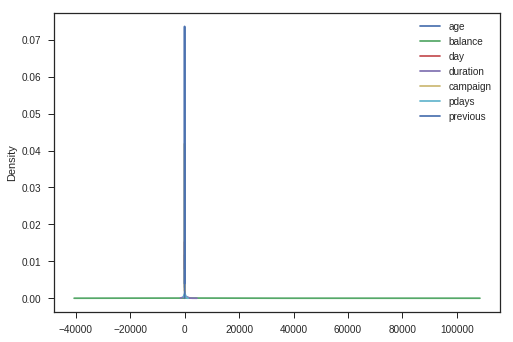

In [12]:
columns_to_normalize.plot.kde(bw_method=3)

In [0]:
normalized_columns = pt.fit_transform(columns_to_normalize)
normalized_columns = pd.DataFrame(normalized_columns, columns=names_col)


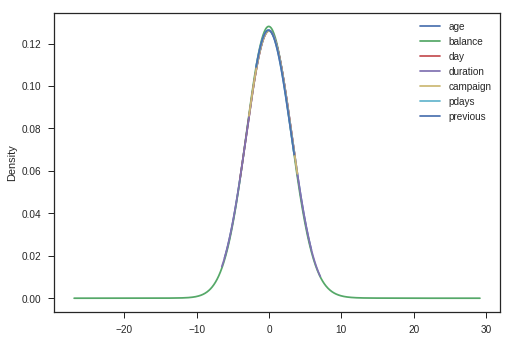

In [14]:
normalized_columns.plot.kde(bw_method=3)

In [15]:
numeric_df_array = np.array(normalized_columns) 
loop_c = -1

for column in numeric_df_array.T:
    loop_c+=1
    x = column
    k2, p = stats.normaltest(x) 
    alpha = 0.001
    print("p = {:g}".format(p))
        
    # rules for printing the normality output
    if p < alpha:
        test_result = "non_normal_distr"
        print("The null hypothesis can be rejected: non-normal distribution")
        
    else:
        test_result = "normal_distr"
        print("The null hypothesis cannot be rejected: normal distribution")


p = 1.36228e-17
The null hypothesis can be rejected: non-normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution
p = 3.43373e-163
The null hypothesis can be rejected: non-normal distribution
p = 0.00209187
The null hypothesis cannot be rejected: normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution
p = 7.4557e-191
The null hypothesis can be rejected: non-normal distribution
p = 6.28232e-191
The null hypothesis can be rejected: non-normal distribution


In [0]:
columns_to_notnormalize = numeric_df
columns_to_notnormalize.drop(columns_to_notnormalize.columns[col_for_normalization], axis=1, inplace=True)


In [0]:
numeric_df_normalized = pd.concat([columns_to_notnormalize.reset_index(drop=True), normalized_columns], axis=1)

In [18]:
numeric_df_normalized

,age,balance,day,duration,campaign,pdays,previous
0,-1.131949,0.275589,0.430558,-0.912349,-1.107958,-0.477714,-0.477734
1,-0.734064,1.192878,-0.529802,0.145328,-1.107958,2.117009,2.153145
2,-0.492714,0.125717,0.086950,-0.044964,-1.107958,2.116381,1.999758
3,-1.131949,0.169655,-1.726794,0.034568,1.085510,-0.477714,-0.477734
4,1.508851,-0.441275,-1.387705,0.175309,-1.107958,-0.477714,-0.477734
5,-0.492714,-0.095740,0.865685,-0.333744,0.133678,2.098513,2.147552
6,-0.378316,-0.277298,-0.152213,0.648433,-1.107958,2.116381,2.126717
7,-0.057331,-0.352990,-1.231266,-0.261967,0.133678,-0.477714,-0.477734
8,0.140189,-0.316857,-0.152213,-1.216755,0.133678,-0.477714,-0.477734
9,0.326147,-0.625045,0.203356,0.547565,-1.107958,2.092070,2.126717
